In [58]:
#vérification de la version de scikit-learn
import sklearn
print(sklearn.__version__)


0.21.3


In [59]:
import pandas as pd


In [60]:
df = pd.read_excel("test.xlsx",sheet_name = 0)
df.head()

,Unnamed: 0,age,orientation,ressources_materials,Mauvais_Gestion_temps,mauvais_choix_de_cours,réseaux_sociaux,resultat_etudiant
0,0,21,0,0,1,0,0,semestre_Valide
1,1,18,0,1,1,1,1,semestre_Rattrapage
2,2,21,0,1,1,0,1,semestre_Valide
3,3,18,0,0,0,1,1,semestre_Rattrapage
4,4,21,1,1,0,0,0,semestre_Valide


In [61]:
df.shape

(402, 8)

In [62]:
#suprimer des headers 
del df['Unnamed: 0']

In [63]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 7 columns):
age                       402 non-null int64
orientation               402 non-null int64
ressources_materials      402 non-null int64
Mauvais_Gestion_temps     402 non-null int64
mauvais_choix_de_cours    402 non-null int64
réseaux_sociaux           402 non-null int64
resultat_etudiant         402 non-null object
dtypes: int64(6), object(1)
memory usage: 22.1+ KB
None


La variable cible ‘’resultat_etudiant ’’ est la seule non-numérique, le type ‘’object’’ lui est associé.

In [64]:
#vérifier la distribution absolue des classes
print(df.resultat_etudiant.value_counts())


semestre_Rattrapage    268
semestre_Valide        134
Name: resultat_etudiant, dtype: int64


In [65]:
#la distribution relative
print(df.resultat_etudiant.value_counts(normalize=True))

semestre_Rattrapage    0.666667
semestre_Valide        0.333333
Name: resultat_etudiant, dtype: float64


2.3 Partition en échantillons d’apprentissage et de test


In [66]:
#subdiviser les données en échantillons d'apprentissage et de test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df, test_size=150, random_state=1, stratify=df.resultat_etudiant)

In [67]:
#vérification des dimensions
print(dfTrain.shape) #(252, 8)
print(dfTest.shape) #(150, 8)


(252, 7)
(150, 7)


Nous affichons les distributions relatives des classes en apprentissage…


In [68]:
#vérification des distributions en apprentissage
print(dfTrain.resultat_etudiant.value_counts(normalize=True))


semestre_Rattrapage    0.666667
semestre_Valide        0.333333
Name: resultat_etudiant, dtype: float64


 et en test.

In [69]:
#vérification des distributions en test
print(dfTest.resultat_etudiant.value_counts(normalize=True))

semestre_Rattrapage    0.666667
semestre_Valide        0.333333
Name: resultat_etudiant, dtype: float64


Les proportions sont respectées.

Instanciation et modélisation

Nous instancions un arbre de décision ‘’DecisionTreeClassifier’’ de la librairie Sckit-Learn
(https://scikit-learn.org/stable/modules/tree.html ; ‘’Classification’’) avec deux paramètres : un
sommet n’est pas segmenté s’il est composé de moins de 30 individus (min_samples_split = 30) ;
une segmentation est validée si et seulement si les feuilles générées comportent tous au moins
10 observations (min_samples_leaf = 10)

In [70]:
#instanciation de l'arbre
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)


Nous lançons le processus de modélisation sur les données d’apprentissage en spécifiant la
matrice (X) des variables prédictives, et le vecteur (y) de la variable cible.

In [71]:
#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.resultat_etudiant)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Affichage graphique de l’arbre

2.5 Affichage graphique de l’arbre
L’affichage de l’arbre était un des obstacles de l’utilisation de cet outil. Auparavant, il fallait
générer un fichier au format particulier (.dot), que l’on faisait interpréter par un outil externe à
installer au préalable. Ce n’était pas vraiment ‘’user friendly’’. Aujourd’hui, depuis la version 0.21
de Scikit-Learn, nous disposons d’une fonction dédiée à la génération de la représentation
graphique directement dans la console. Voyons ce qu’il en est.
La fonction prend en paramètre l’arbre généré par l’apprentissage, la liste des noms des
variables prédictives (feature_names), les sommets peuvent être coloriés selon la classe
majoritaire (filled = True).

[Text(157.5529411764706, 201.90857142857143, 'age <= 19.5\ngini = 0.444\nsamples = 252\nvalue = [168, 84]'),
 Text(78.7764705882353, 170.84571428571428, 'réseaux_sociaux <= 0.5\ngini = 0.361\nsamples = 114\nvalue = [87, 27]'),
 Text(39.38823529411765, 139.78285714285715, 'ressources_materials <= 0.5\ngini = 0.435\nsamples = 47\nvalue = [32, 15]'),
 Text(19.694117647058825, 108.72, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(59.082352941176474, 108.72, 'gini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(118.16470588235295, 139.78285714285715, 'orientation <= 0.5\ngini = 0.294\nsamples = 67\nvalue = [55, 12]'),
 Text(98.47058823529412, 108.72, 'ressources_materials <= 0.5\ngini = 0.355\nsamples = 39\nvalue = [30, 9]'),
 Text(78.7764705882353, 77.65714285714284, 'gini = 0.403\nsamples = 25\nvalue = [18, 7]'),
 Text(118.16470588235295, 77.65714285714284, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(137.85882352941178, 108.72, 'gini = 0.191\nsamples = 28\nvalue = [25, 3]

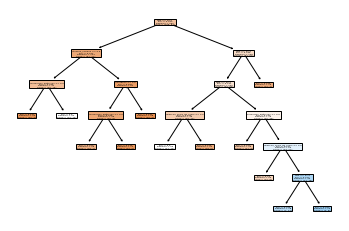

In [72]:
#affichage graphique de l'arbre - depuis sklearn 0.21
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
from sklearn.tree import plot_tree
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

In [1]:
#affichage plus grand pour une meilleure lisibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(70,20))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

NameError: name 'plot_tree' is not defined

In [75]:
#affichage sous forme de règles
#plus facile à appréhender quand l'arbre est très grand
from sklearn.tree import export_text
tree_rules = export_text(arbreFirst,feature_names = list(df.columns[:-1]),show_weights=True)


In [77]:
#importance des variables
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

                 Variable  Importance
0                     age    0.375502
2    ressources_materials    0.329579
4  mauvais_choix_de_cours    0.187018
5         réseaux_sociaux    0.073915
1             orientation    0.033986
3   Mauvais_Gestion_temps    0.000000
